In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn

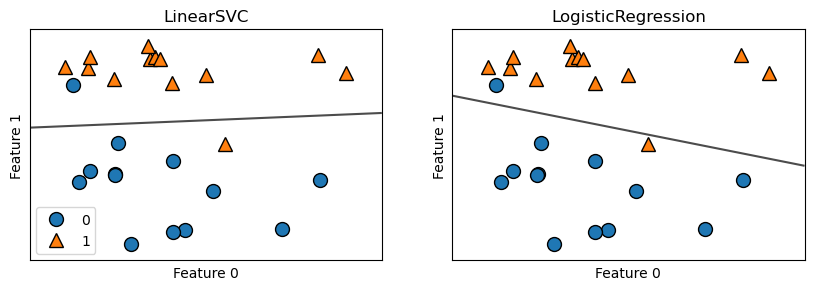

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
# svm: support vector machine; svc: support vector classifier

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(dual=False, max_iter=10000), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

**problems: the decision boundary of LogisticRegresion is different from the book**<br>
**even the slope is wrong!!!**

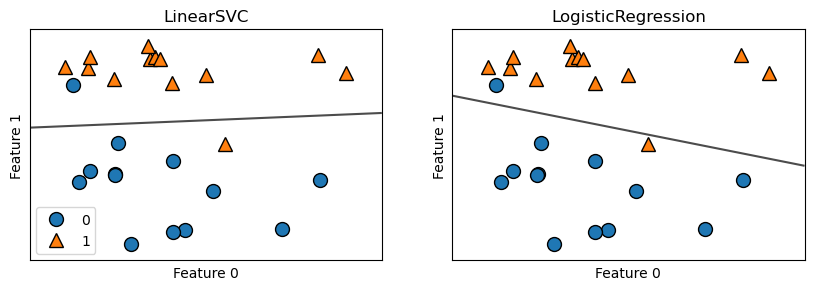

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
# svm: support vector machine; svc: support vector classifier

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(dual=False, max_iter=100000), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

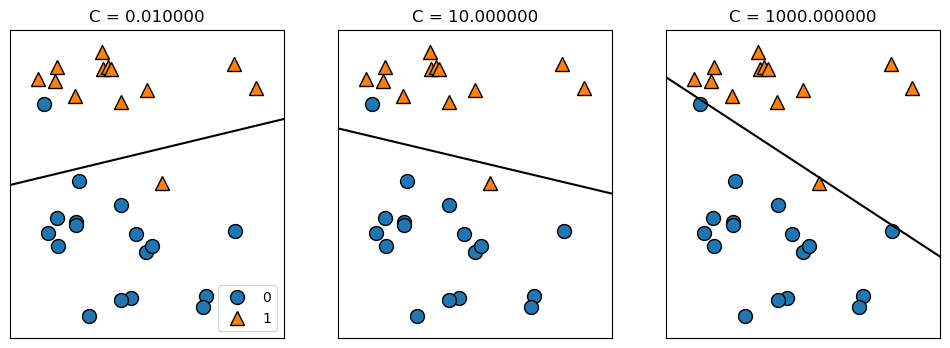

In [15]:
mglearn.plots.plot_linear_svc_regularization()

In [23]:
# now we apply Logistic Regression on breast cancer dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=10000).fit(X_train, y_train)
print("Training set score: {}".format(logreg.score(X_train, y_train)))
print("Test set score: {}".format(logreg.score(X_test, y_test)))

Training set score: 0.9577464788732394
Test set score: 0.958041958041958


In [26]:
logreg100 = LogisticRegression(C=100, max_iter=10000).fit(X_train, y_train)
print("Training set score: {}".format(logreg100.score(X_train, y_train)))
print("Test set score: {}".format(logreg100.score(X_test, y_test)))

Training set score: 0.9835680751173709
Test set score: 0.965034965034965


In [29]:
logreg001 = LogisticRegression(C=0.01, max_iter=1000000).fit(X_train, y_train)
print("Training set score: {}".format(logreg001.score(X_train, y_train)))
print("Test set score: {}".format(logreg001.score(X_test, y_test)))

Training set score: 0.9530516431924883
Test set score: 0.951048951048951


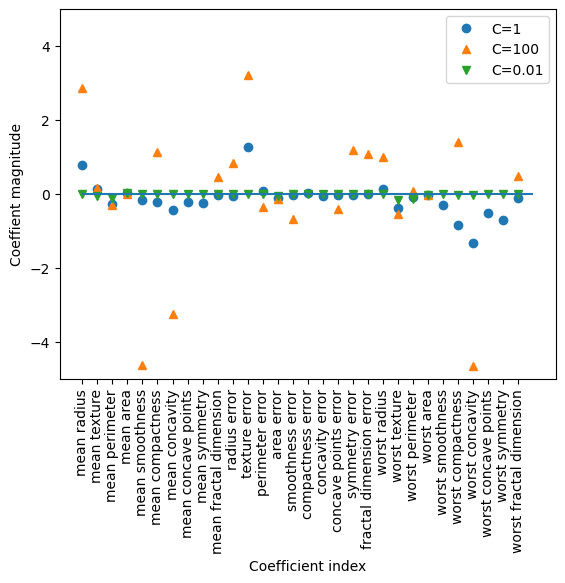

In [31]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coeffient magnitude")
plt.legend()

**still have problems in linear model for classification**
